# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans

# Gaussian Distribution

In [2]:
def gauss(X, mu, sigma):
    return np.exp(-1 / (2 * sigma**2) * (X - mu)**2) / np.sqrt(2 * np.pi * sigma**2)

# RBF using sklearn KMeans

In [3]:
class RBF:
    """Implementation of a Radial Basis Function Network"""
    # Initializing params.
    def __init__(self, x, k=2, lr=0.1, epochs=150):
        self.x = x
        self.k = k
        self.lr = lr
        
        self.epochs = epochs
        self.kmeans = KMeans(k).fit(np.array(x).reshape(-1, 1))
        
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
    
    # Finding the mean and std of each functions
    def fit(self, y):
        self.y = y
        self.centers = np.array(self.kmeans.cluster_centers_)
        
        ## first approach
        max_d = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])

        ## second approach
        # max_d = 0
        # for i in range(self.k):
        #     if i == self.k:
        #         continue
        #     for c1 in self.centers:
        #         for c2 in self.centers:
        #             d = abs(c1 - c2)
        #             if (d > max_d).all():
        #                 max_d = d

        self.std = np.repeat(max_d / np.sqrt(self.k * 2), self.k)
        
    def train(self):
        for epoch in range(self.epochs):
            for i in range(self.x.shape[0]):
                # Forward pass
                a = np.array([gauss(self.x[i], c, s) for c,s in zip(self.centers.T[0], self.std)])
                
                F = a.T.dot(self.w) + self.b
                cost = (y[i] - F).flatten() ** 2

                #backward pass
                error = -(y[i] - F).flatten()

                #online update      
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error
        
    def predict(self, x, plot=False):
        y_predicted = []
        for i in range(x.shape[0]):
            a = np.array([gauss(x[i], c, s) for c, s, in zip(self.centers, self.std)])
            F = a.T.dot(self.w) + self.b
            y_predicted.append(F)
        
        if plot:
            plt.plot(self.x, self.y, '-o', label='true')
            plt.plot(self.x, y_predicted, '-o', label='RBF-Net')
            plt.legend()
            plt.tight_layout()
            plt.show()
            
        return y_predicted

## Test

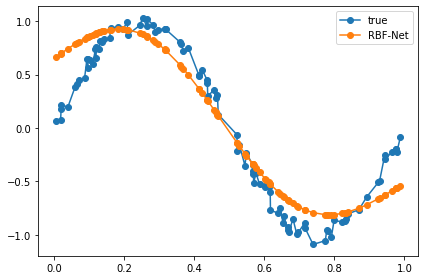

In [12]:
# Wave generation
NUM_SAMPLES = 100
np.random.seed(0)
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(X, axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X)  +  noise

# creating RBF object
rbf = RBF(X, k=2, lr=.01, epochs=200)
rbf.fit(y)
rbf.train()
rbf_pred = rbf.predict(X, plot=True)

# K-Means

In [14]:
np.random.seed(42)
class Kmeans:
    def __init__(self, K=5, max_iters=100, plot=False):
        self.K = K
        self.max_iters = max_iters
        self.plot = plot
        self.mean = []
        self.num_samples, self.num_features = 0, 0
  
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []
    
    def _initialize_centroids(self, X):

        # 1
        # for _ in range(self.K):
        #     centroid = X[np.random.choice(range(self.num_samples))]
        #     self.centroids.append(centroid)
        
        # 2
            # for _ in range(self.K):
            #     centroid = X[np.random.choice(self.num_samples, replace=False)]
            #     self.centroids.append(centroid)
        
        # 3 - MAIN    
        random_sample_idxs = np.random.choice(self.num_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.num_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, point in enumerate(self.X):
            closest_centroid = np.argmin(np.sqrt(np.sum((point - centroids) ** 2, axis=1)))
            clusters[closest_centroid].append(idx)    
        return clusters

    def _new_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[idx] = cluster_mean
        return centroids

    def fit(self, X):
        self.X = X
        self.num_samples, self.num_features = X.shape
        # print(f"num_samples: {self.num_samples}")
        # print(f"range um_samples: {range(self.num_samples)}")

        # initialize
        self._initialize_centroids(X)
        
        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot:
                self._plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._new_centroids(self.clusters)

            # check if clusters have changed
            diff = self.centroids - centroids_old
            if not diff.any():
                break
                        
            if self.plot:
                self._plot()
                
        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()
        
    def _plot_(self, X, Y):
        fig = px.scatter(X[:, 0], X[:, 1], color=Y)
        fig.show()

    def _mean(self, X):
        dist_t = []
        for i in range(len(self.centroids)):
            dist = []
            for j in self.clusters[i]:
                dis = np.sqrt(np.sum((X[j] - self.centroids[i])**2))
                dist.append(dis)
            dist_t.append(dist)
            self.mean.append(np.mean(dist_t[i])) 
        return self.mean
    
    def _mean_total(self, X):
        mean = self._mean(X)
        print("____________________Check____________________")
        print(f"mean:\n{mean}")
        print(f"Length of mean:\n{len(mean)}")
        return np.mean(mean)

# RBF using our KMeans

In [15]:
class _RBF:
    """Implementation of a Radial Basis Function Network"""
    # Initializing params.
    def __init__(self, x, k=2, lr=0.1, epochs=150):
        self.x = x
        self.k = k
        self.lr = lr
        
        self.epochs = epochs
        self.kmeans = Kmeans(K=k, max_iters=100, plot=False)
        
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)
    
    # Finding the mean and std of each functions
    def fit(self, y):
        self.y = y
        self.kmeans.fit(np.asarray(list(zip(self.x,self.y))))
        self.centers = self.kmeans.centroids[:,0].reshape(self.k,1)
        
        ## first approach
        max_d = max([np.abs(c1 - c2) for c1 in self.centers for c2 in self.centers])

        ## second approach
        # max_d = 0
        # for i in range(self.k):
        #     if i == self.k:
        #         continue
        #     for c1 in self.centers:
        #         for c2 in self.centers:
        #             d = abs(c1 - c2)
        #             if (d > max_d).all():
        #                 max_d = d

        self.std = np.repeat(max_d / np.sqrt(self.k * 2), self.k)
        
    def train(self):
        for epoch in range(self.epochs):
            for i in range(self.x.shape[0]):
                # Forward pass
                a = np.array([gauss(self.x[i], c, s) for c,s in zip(self.centers.T[0], self.std)])
                
                F = a.T.dot(self.w) + self.b
                cost = (y[i] - F).flatten() ** 2

                #backward pass
                error = -(y[i] - F).flatten()

                #online update      
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error
        
    def predict(self, x, plot=False):
        y_predicted = []
        for i in range(x.shape[0]):
            a = np.array([gauss(x[i], c, s) for c, s, in zip(self.centers, self.std)])
            F = a.T.dot(self.w) + self.b
            y_predicted.append(F)
        
        if plot:
            plt.plot(self.x, self.y, '-o', label='true')
            plt.plot(self.x, y_predicted, '-o', label='RBF-Net')
            plt.legend()
            plt.tight_layout()
            plt.show()
            
        return y_predicted

## Test

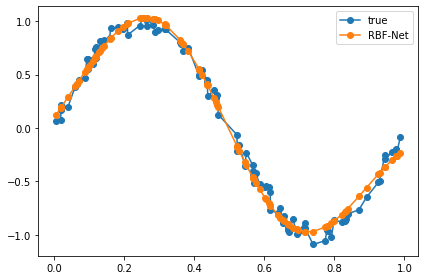

In [19]:
rbf = _RBF(X, k=5, lr=.01, epochs=200)
rbf.fit(y)
rbf.train()
rbf_pred = rbf.predict(X, plot=True)